In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

mercedes_data=pd.read_csv('mercedes.csv')


cat_cols=[col for col in mercedes_data.columns if mercedes_data[col].dtype=='object']

target=mercedes_data['y']

mercedes_data.drop(columns='y',inplace=True)

cols_to_drop=[]

for col in mercedes_data.columns:
    if len(np.unique(mercedes_data[col]))==mercedes_data.shape[0] or len(np.unique(mercedes_data[col]))==1:
        cols_to_drop.append(col)

cols_to_drop

mercedes_data.drop(columns=cols_to_drop, inplace=True)

X_train,X_test,y_train,y_test=train_test_split(mercedes_data,target,test_size=0.2,random_state=42)

target.describe()

le=LabelEncoder()

cols_to_drop

['ID',
 'X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [2]:
cols_to_drop=[]

for col in mercedes_data.columns:
    if len(np.unique(mercedes_data[col]))==mercedes_data.shape[0] or len(np.unique(mercedes_data[col]))==1:
        cols_to_drop.append(col)
        
cols_to_drop

[]

In [3]:
class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
        
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [4]:
le=LabelEncoderExt()

cat_cols = [col for col in X_train.columns if X_train[col].dtype=='object']
for col in cat_cols:
    le.fit(X_train[col])
    X_train[col]=le.transform(X_train[col])
    X_test[col]=le.transform(X_test[col])
    
X_train.values

array([[34, 24, 17, ...,  0,  0,  0],
       [35, 21, 17, ...,  0,  0,  0],
       [27,  5, 33, ...,  0,  0,  0],
       ...,
       [45, 25,  4, ...,  0,  0,  0],
       [45, 20,  9, ...,  0,  0,  0],
       [22,  2,  8, ...,  0,  0,  0]], dtype=int64)

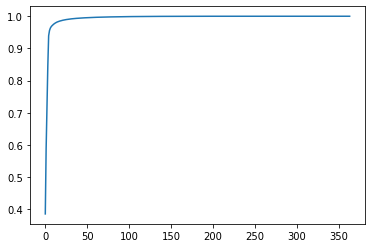

In [5]:
from sklearn.decomposition import PCA

pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [6]:
pca.explained_variance_ratio_

array([3.86001453e-01, 2.02461541e-01, 1.36571828e-01, 1.19913487e-01,
       9.44690848e-02, 1.59898694e-02, 7.58666354e-03, 4.45601578e-03,
       3.03658703e-03, 2.48937824e-03, 2.40885247e-03, 2.01942836e-03,
       1.68438192e-03, 1.49805963e-03, 1.31715671e-03, 1.05672330e-03,
       9.56937433e-04, 9.20785473e-04, 7.82713294e-04, 7.17099444e-04,
       6.57274153e-04, 6.34109848e-04, 5.86819124e-04, 5.19041785e-04,
       4.95507625e-04, 4.47177611e-04, 4.09722580e-04, 3.80469657e-04,
       3.70791804e-04, 3.56875281e-04, 3.32427489e-04, 3.12681757e-04,
       3.03701859e-04, 2.78104353e-04, 2.62451678e-04, 2.53040467e-04,
       2.27024350e-04, 2.17624816e-04, 2.05476068e-04, 1.97970720e-04,
       1.84892231e-04, 1.83338893e-04, 1.78909767e-04, 1.76932402e-04,
       1.70639880e-04, 1.53527941e-04, 1.50269825e-04, 1.46323887e-04,
       1.39362790e-04, 1.35205812e-04, 1.33446542e-04, 1.32422261e-04,
       1.29824575e-04, 1.21536788e-04, 1.15671187e-04, 1.10344847e-04,
      

In [7]:
pca_1=PCA(n_components=50)

X_train_pca_df=pd.DataFrame(pca_1.fit_transform(X_train),columns=list(range(0,50)))

X_test_pca_df=pd.DataFrame(pca_1.transform(X_test))

In [8]:
#proof that PCA results in zero or no multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_pca = pd.DataFrame()
vif_pca["VIF Factor_PCA"] = [variance_inflation_factor(X_train_pca_df.values, i ) for i in range(X_train_pca_df.shape[1])]

vif_pca['Column Name']=X_train_pca_df.columns

vif_pca

,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [ ]:
#multicolinaerity exists without PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

vif['Column Name']= X_train.columns

vif

In [11]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

linreg.fit(X_train,y_train)

pred=linreg.predict(X_test)



In [14]:
from sklearn.metrics import r2_score,mean_squared_error



mean_squared_error(y_test,pred)

4.832722097585036e+19

In [15]:
r2_score(y_test,pred)

-3.104866027332779e+17